In [ ]:
!pip install synapseclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.2/468.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5


In [ ]:
 !synapse get -r syn68252592

Synapse username (Optional): Krzysztof_Tkaczyk
Auth token for user Krzysztof_Tkaczyk:
Welcome, Krzysztof_Tkaczyk!

[syn68252592:Docker]: Syncing Folder from Synapse.
[syn68253746]: Downloaded to /content/docker_attempt_utils.ipynb
[syn68253745]: Downloaded to /content/run_segmentation.py
[syn68254599]: Downloaded to /content/output_2023_unchanged.zip
[syn68254600]: Downloaded to /content/output_Africa_unchanged.zip
[syn68253744]: Downloaded to /content/requirements.txt
[syn68254608]: Downloaded to /content/BraTs_Africa_processed.zip
[syn68254607]: Downloaded to /content/BraTs_2023_processed.zip

In [ ]:
!ls -l

total 428548
-rw-r--r-- 1 root root 194696419 Jun 12 21:01 BraTs_2023_processed.zip
-rw-r--r-- 1 root root 243241312 Jun 12 21:01 BraTs_Africa_processed.zip
-rw-r--r-- 1 root root     26492 Jun 12 21:01 docker_attempt_utils.ipynb
-rw-r--r-- 1 root root    286872 Jun 12 21:01 output_2023_unchanged.zip
-rw-r--r-- 1 root root    543294 Jun 12 21:01 output_Africa_unchanged.zip
-rw-r--r-- 1 root root        13 Jun 12 21:01 requirements.txt
-rw-r--r-- 1 root root      1781 Jun 12 21:01 run_segmentation.py
drwxr-xr-x 1 root root      4096 Jun 11 13:37 sample_data
-rw-r--r-- 1 root root       900 Jun 12 21:01 SYNAPSE_METADATA_MANIFEST.tsv


In [ ]:
%%shell
unzip /content/BraTs_Africa_processed.zip -d /BraTs_Africa_processed

Archive:  /content/BraTs_Africa_processed.zip
   creating: /BraTs_Africa_processed/BraTs_Africa_processed/
   creating: /BraTs_Africa_processed/BraTs_Africa_processed/all/
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00007_flair.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00007_t1.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00007_t1ce.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00007_t2.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00010_flair.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00010_t1.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00010_t1ce.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/BraTSAfrica_00010_t2.nii.gz  
  inflating: /BraTs_Africa_processed/BraTs_Africa_processed/all/Br

In [ ]:
!ls -l /BraTs_Africa_processed/BraTs_Africa_processed

total 16
drwxrwxrwx 2 root root 4096 Jun 12 10:11 all
drwxrwxrwx 2 root root 4096 Jun 12 05:42 input
drwxrwxrwx 2 root root 4096 Jun 12 10:11 output
drwxrwxrwx 2 root root 4096 Jun 12 10:11 segmentation


In [ ]:
import nibabel as nib
import numpy as np

sample_id = 'BraTSAfrica_00007'
seg_id = 'BraTsAfrica_00007'

output_path = f'/BraTs_Africa_processed/BraTs_Africa_processed/output/{sample_id}.nii.gz'
segmentation_path = f'/BraTs_Africa_processed/BraTs_Africa_processed/segmentation/{seg_id}_seg.nii.gz'

output_img = nib.load(output_path).get_fdata()
seg_img = nib.load(segmentation_path).get_fdata()

output_labels = np.unique(output_img).astype(int)
segmentation_labels = np.unique(seg_img).astype(int)

print(f"Klasy obecne w predykcji ({sample_id}): {output_labels}")
print(f"Klasy obecne w segmentacji ({sample_id}_seg): {segmentation_labels}")


Klasy obecne w predykcji (BraTSAfrica_00007): [0 1 2 3]
Klasy obecne w segmentacji (BraTSAfrica_00007_seg): [0 1 2 3]


In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

def dice_coefficient(pred, truth, label, smooth=1e-6):
    """
    Calculate Dice coefficient for a specific label
    """

    pred_bin = (pred == label).astype(np.float32)
    truth_bin = (truth == label).astype(np.float32)

    intersection = np.sum(pred_bin * truth_bin)
    union = np.sum(pred_bin) + np.sum(truth_bin)

    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice

def calculate_enhanced_tumor_regions(pred, truth):
    """
    Calculate Dice for BraTS enhanced tumor regions:
    - Whole Tumor (WT): labels 1, 2, 3
    - Tumor Core (TC): labels 1, 3
    - Enhancing Tumor (ET): label 3
    """
    results = {}

    for label in [1, 2, 3]:
        dice = dice_coefficient(pred, truth, label)
        results[f'dice_class_{label}'] = dice

    pred_wt = (pred > 0).astype(np.float32)
    truth_wt = (truth > 0).astype(np.float32)
    intersection_wt = np.sum(pred_wt * truth_wt)
    union_wt = np.sum(pred_wt) + np.sum(truth_wt)
    dice_wt = (2.0 * intersection_wt + 1e-6) / (union_wt + 1e-6) if union_wt > 0 else 1.0
    results['dice_whole_tumor'] = dice_wt

    pred_tc = ((pred == 1) | (pred == 3)).astype(np.float32)
    truth_tc = ((truth == 1) | (truth == 3)).astype(np.float32)
    intersection_tc = np.sum(pred_tc * truth_tc)
    union_tc = np.sum(pred_tc) + np.sum(truth_tc)
    dice_tc = (2.0 * intersection_tc + 1e-6) / (union_tc + 1e-6) if union_tc > 0 else 1.0
    results['dice_tumor_core'] = dice_tc

    results['dice_enhancing_tumor'] = results['dice_class_3']

    return results

output_dir = '/BraTs_Africa_processed/BraTs_Africa_processed/output'
segmentation_dir = '/BraTs_Africa_processed/BraTs_Africa_processed/segmentation'

pred_paths = sorted(glob(os.path.join(output_dir, '*.nii.gz')))

records = []

print(f"Found {len(pred_paths)} prediction files")

for pred_path in tqdm(pred_paths, desc="Calculating Dice scores"):
    filename = os.path.basename(pred_path).replace('.nii.gz', '')  # e.g. BraTS2023_00035

    seg_filename = filename.replace('BraTS', 'BraTs') + '_seg.nii.gz'
    seg_path = os.path.join(segmentation_dir, seg_filename)

    if not os.path.exists(seg_path):
        print(f"⚠️ Missing GT file for {filename}")
        continue

    try:
        pred_img = nib.load(pred_path)
        truth_img = nib.load(seg_path)

        pred = pred_img.get_fdata().astype(np.int32)
        truth = truth_img.get_fdata().astype(np.int32)

        if pred.shape != truth.shape:
            print(f"⚠️ Shape mismatch for {filename}: pred {pred.shape} vs truth {truth.shape}")
            continue

        entry = {'id': filename}

        metrics = calculate_enhanced_tumor_regions(pred, truth)
        entry.update(metrics)

        entry['pred_labels'] = list(np.unique(pred))
        entry['truth_labels'] = list(np.unique(truth))
        entry['pred_nonzero_voxels'] = np.sum(pred > 0)
        entry['truth_nonzero_voxels'] = np.sum(truth > 0)

        records.append(entry)

    except Exception as e:
        print(f"❌ Error processing {filename}: {str(e)}")
        continue

df = pd.DataFrame(records)

if len(df) > 0:
    print(f"\n✅ DataFrame ready with {len(df)} samples:")
    print(df.head())

    dice_columns = [col for col in df.columns if col.startswith('dice_')]
    print(f"\n📊 Summary statistics:")
    print(df[dice_columns].describe())

    output_file = 'dice_scores_detailed.csv'
    df.to_csv(output_file, index=False)
    print(f"\n💾 Results saved to {output_file}")

    low_dice_threshold = 0.1
    for dice_col in dice_columns:
        low_dice_cases = df[df[dice_col] < low_dice_threshold]
        if len(low_dice_cases) > 0:
            print(f"\n⚠️ Cases with low {dice_col} (< {low_dice_threshold}):")
            print(low_dice_cases[['id', dice_col]].head())
else:
    print("❌ No valid samples processed!")

Found 20 prediction files


Calculating Dice scores: 100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


✅ DataFrame ready with 20 samples:
                  id  dice_class_1  dice_class_2  dice_class_3  \
0  BraTSAfrica_00007      0.812167      0.917022      0.836941   
1  BraTSAfrica_00010      0.843295      0.886220      0.875974   
2  BraTSAfrica_00028      0.836654      0.660216      0.832757   
3  BraTSAfrica_00050      0.023689      0.951206      0.807163   
4  BraTSAfrica_00051      0.392258      0.953971      0.858308   

   dice_whole_tumor  dice_tumor_core  dice_enhancing_tumor   pred_labels  \
0          0.956828         0.955199              0.836941  [0, 1, 2, 3]   
1          0.964221         0.952195              0.875974  [0, 1, 2, 3]   
2          0.961289         0.873193              0.832757  [0, 1, 2, 3]   
3          0.958750         0.787073              0.807163  [0, 1, 2, 3]   
4          0.976038         0.875814              0.858308  [0, 1, 2, 3]   

   truth_labels  pred_nonzero_voxels  truth_nonzero_voxels  
0  [0, 1, 2, 3]               276747             

In [ ]:
df

,id,dice_class_1,dice_class_2,dice_class_3,dice_whole_tumor,dice_tumor_core,dice_enhancing_tumor,pred_labels,truth_labels,pred_nonzero_voxels,truth_nonzero_voxels
0,BraTSAfrica_00007,8.121670e-01,9.170220e-01,8.369405e-01,9.568278e-01,9.551988e-01,8.369405e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",276747,295774
1,BraTSAfrica_00010,8.432949e-01,8.862195e-01,8.759745e-01,9.642206e-01,9.521946e-01,8.759745e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",161323,163613
2,BraTSAfrica_00028,8.366544e-01,6.602163e-01,8.327574e-01,9.612886e-01,8.731930e-01,8.327574e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",170765,168773
3,BraTSAfrica_00050,2.368866e-02,9.512062e-01,8.071630e-01,9.587502e-01,7.870734e-01,8.071630e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",110665,108197
4,BraTSAfrica_00051,3.922581e-01,9.539706e-01,8.583083e-01,9.760380e-01,8.758141e-01,8.583083e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",93778,92559
5,BraTSAfrica_00076,8.263704e-02,8.690397e-01,9.146990e-01,9.269436e-01,8.923307e-01,9.146990e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",215050,230414
6,BraTSAfrica_00080,2.044990e-09,9.540845e-01,9.696128e-01,9.720131e-01,9.792405e-01,9.696128e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",64220,65305
7,BraTSAfrica_00081,1.638079e-02,6.765803e-01,5.232792e-01,9.416625e-01,3.199117e-01,5.232792e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",277612,284874
8,BraTSAfrica_00095,6.969067e-01,7.162372e-01,3.233621e-01,9.304895e-01,9.412022e-01,3.233621e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",180184,195932
9,BraTSAfrica_00096,8.844523e-01,7.282270e-01,8.070990e-01,9.507030e-01,8.892090e-01,8.070990e-01,"[0, 1, 2, 3]","[0, 1, 2, 3]",193188,200365


<ipython-input-8-1157394016>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


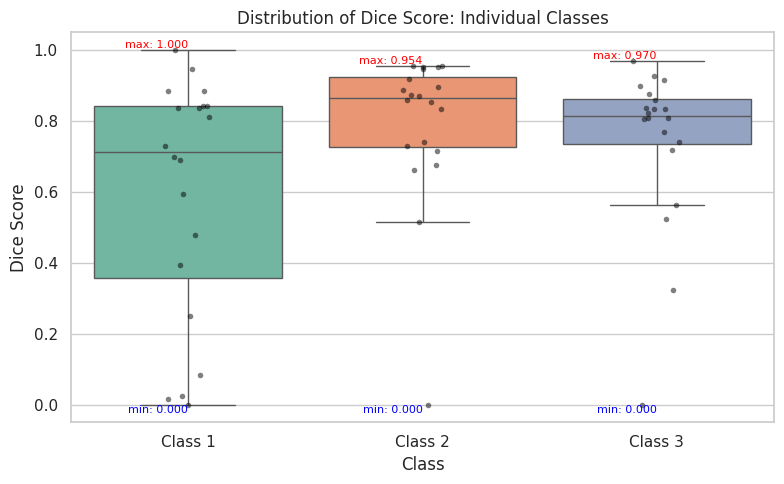

<ipython-input-8-1157394016>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


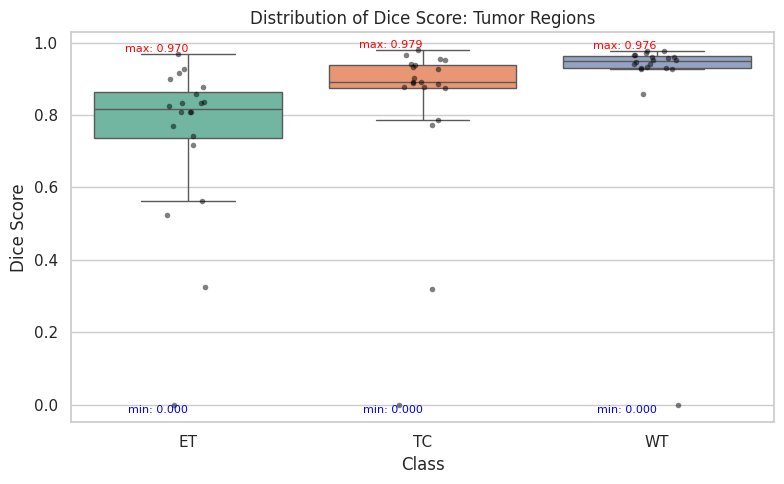

Summary Statistics:

Individual Classes:
         count    mean     std  min     max
class                                      
Class 1     20  0.5921  0.3427  0.0  1.0000
Class 2     20  0.7892  0.2214  0.0  0.9541
Class 3     20  0.7415  0.2321  0.0  0.9696

Tumor Regions:
       count    mean     std  min     max
class                                    
ET        20  0.7415  0.2321  0.0  0.9696
TC        20  0.8279  0.2400  0.0  0.9792
WT        20  0.8983  0.2131  0.0  0.9760


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="whitegrid")

class_data = []
for label in [1, 2, 3]:
    col_name = f'dice_class_{label}'
    if col_name in df.columns:
        for idx, value in df[col_name].items():
            class_data.append({
                'class': f'Class {label}',
                'dice_score': value,
                'class_type': 'Individual Classes'
            })

region_mapping = {
    'dice_enhancing_tumor': 'ET',
    'dice_tumor_core': 'TC',
    'dice_whole_tumor': 'WT'
}

region_data = []
for col_name, label in region_mapping.items():
    if col_name in df.columns:
        for idx, value in df[col_name].items():
            region_data.append({
                'class': label,
                'dice_score': value,
                'class_type': 'Tumor Regions'
            })

plot_data = pd.DataFrame(class_data + region_data)

class_types = ['Individual Classes', 'Tumor Regions']

for class_type in class_types:
    subset_data = plot_data[plot_data['class_type'] == class_type]

    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(
        data=subset_data, x='class', y='dice_score',
        palette='Set2', showcaps=True, fliersize=0
    )
    sns.stripplot(
        data=subset_data, x='class', y='dice_score',
        color='black', size=4, jitter=True, ax=ax, alpha=0.5
    )

    for i, cls in enumerate(sorted(subset_data['class'].unique())):
        vals = subset_data[subset_data['class'] == cls]['dice_score'].dropna()
        if not vals.empty:
            min_val = vals.min()
            max_val = vals.max()
            mean_val = vals.mean()

            ax.text(i, min_val, f"min: {min_val:.3f}",
                   color='blue', ha='right', va='top', fontsize=8)
            ax.text(i, max_val, f"max: {max_val:.3f}",
                   color='red', ha='right', va='bottom', fontsize=8)

    plt.title(f'Distribution of Dice Score: {class_type}')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Dice Score', fontsize=12)
    plt.tight_layout()
    plt.show()

print("Summary Statistics:")
print("="*50)
for class_type in class_types:
    subset_data = plot_data[plot_data['class_type'] == class_type]
    print(f"\n{class_type}:")
    summary = subset_data.groupby('class')['dice_score'].agg(['count', 'mean', 'std', 'min', 'max']).round(4)
    print(summary)

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from glob import glob

segmentation_dir = '/BraTs_Africa_processed/BraTs_Africa_processed/segmentation'

seg_files = sorted(glob(os.path.join(segmentation_dir, '*.nii.gz')))

volume_data = []

for seg_path in tqdm(seg_files, desc="Processing segmentation files"):
    try:
        img = nib.load(seg_path)
        data = img.get_fdata().astype(np.int32)

        classes, counts = np.unique(data, return_counts=True)
        class_volume = dict(zip(classes.astype(int), counts))

        filename = os.path.basename(seg_path)
        case_id = filename.replace('_seg.nii.gz', '').replace('BraTs', 'BraTS')

        record = {
            'id': case_id,
            'seg_filename': filename,
            'volume_class_0': class_volume.get(0, 0),  # Background
            'volume_class_1': class_volume.get(1, 0),  # Necrotic and non-enhancing tumor
            'volume_class_2': class_volume.get(2, 0),  # Peritumoral edema
            'volume_class_3': class_volume.get(3, 0),  # Enhancing tumor
            'volume_total_voxels': int(np.prod(data.shape)),
        }

        record['volume_whole_tumor'] = sum([class_volume.get(i, 0) for i in [1, 2, 3]])

        record['volume_tumor_core'] = class_volume.get(1, 0) + class_volume.get(3, 0)

        record['volume_enhancing_tumor'] = class_volume.get(3, 0)

        total_voxels = record['volume_total_voxels']
        record['percent_class_1'] = (record['volume_class_1'] / total_voxels) * 100
        record['percent_class_2'] = (record['volume_class_2'] / total_voxels) * 100
        record['percent_class_3'] = (record['volume_class_3'] / total_voxels) * 100
        record['percent_whole_tumor'] = (record['volume_whole_tumor'] / total_voxels) * 100
        record['percent_tumor_core'] = (record['volume_tumor_core'] / total_voxels) * 100
        record['percent_enhancing_tumor'] = (record['volume_enhancing_tumor'] / total_voxels) * 100

        voxel_dims = img.header.get_zooms()[:3]  # x, y, z dimensions in mm
        voxel_volume_mm3 = np.prod(voxel_dims)  # Volume of one voxel in mm³

        record['voxel_volume_mm3'] = voxel_volume_mm3
        record['physical_volume_class_1_mm3'] = record['volume_class_1'] * voxel_volume_mm3
        record['physical_volume_class_2_mm3'] = record['volume_class_2'] * voxel_volume_mm3
        record['physical_volume_class_3_mm3'] = record['volume_class_3'] * voxel_volume_mm3
        record['physical_volume_whole_tumor_mm3'] = record['volume_whole_tumor'] * voxel_volume_mm3

        volume_data.append(record)

    except Exception as e:
        print(f"Error processing {seg_path}: {str(e)}")
        continue

volume_df = pd.DataFrame(volume_data)

print(f"✅ Processed {len(volume_df)} segmentation files")
print(f"📊 Volume statistics calculated")

print("\n📈 Class Volume Statistics (voxels):")
volume_cols = ['volume_class_1', 'volume_class_2', 'volume_class_3',
               'volume_whole_tumor', 'volume_tumor_core', 'volume_enhancing_tumor']
print(volume_df[volume_cols].describe().round(2))

print("\n📊 Class Volume Percentages:")
percent_cols = ['percent_class_1', 'percent_class_2', 'percent_class_3',
                'percent_whole_tumor', 'percent_tumor_core', 'percent_enhancing_tumor']
print(volume_df[percent_cols].describe().round(4))

if 'df' in globals() and 'id' in df.columns:
    print("\n🔗 Merging with existing Dice DataFrame...")
    df_merged = df.merge(volume_df, on='id', how='left')
    print(f"Merged DataFrame shape: {df_merged.shape}")

    missing_matches = df_merged['volume_class_1'].isna().sum()
    if missing_matches > 0:
        print(f"⚠️ {missing_matches} cases couldn't be matched by ID")

    df = df_merged
else:
    print("📋 Creating new DataFrame with volume data")
    df = volume_df

print("\n📋 Sample of volume data:")
display_cols = ['id', 'volume_class_1', 'volume_class_2', 'volume_class_3',
                'percent_whole_tumor', 'physical_volume_whole_tumor_mm3']
print(df[display_cols].head())

volume_df.to_csv('class_volumes_braTS.csv', index=False)
print(f"\n💾 Volume data saved to 'class_volumes_braTS.csv'")

print("\n🔍 Cases with missing tumor classes:")
for class_num in [1, 2, 3]:
    missing_cases = volume_df[volume_df[f'volume_class_{class_num}'] == 0]
    print(f"Class {class_num}: {len(missing_cases)} cases with 0 voxels")
    if len(missing_cases) < 10:  # Show IDs if not too many
        print(f"  IDs: {missing_cases['id'].tolist()}")

print(f"\n🏆 Top 5 cases by whole tumor volume:")
top_tumors = volume_df.nlargest(5, 'volume_whole_tumor')[['id', 'volume_whole_tumor', 'percent_whole_tumor']]
print(top_tumors)

print(f"\n📉 Smallest 5 cases by whole tumor volume:")
small_tumors = volume_df.nsmallest(5, 'volume_whole_tumor')[['id', 'volume_whole_tumor', 'percent_whole_tumor']]
print(small_tumors)

Processing segmentation files: 100%|██████████| 20/20 [00:05<00:00,  3.41it/s]

✅ Processed 20 segmentation files
📊 Volume statistics calculated

📈 Class Volume Statistics (voxels):
       volume_class_1  volume_class_2  volume_class_3  volume_whole_tumor  \
count           20.00           20.00           20.00               20.00   
mean         37064.25       107275.50        42729.05           187068.80   
std          38983.14        65224.46        32028.28            86452.44   
min              0.00          534.00          492.00             1026.00   
25%            844.75        64037.75        17860.25           149759.00   
50%          27185.00       108419.00        30369.00           212197.50   
75%          62931.25       153803.75        64280.00           240513.75   
max         112509.00       252879.00       108351.00           295774.00   

       volume_tumor_core  volume_enhancing_tumor  
count              20.00                   20.00  
mean            79793.30                42729.05  
std             55074.23                32028.28  


<Figure size 2000x1000 with 0 Axes>

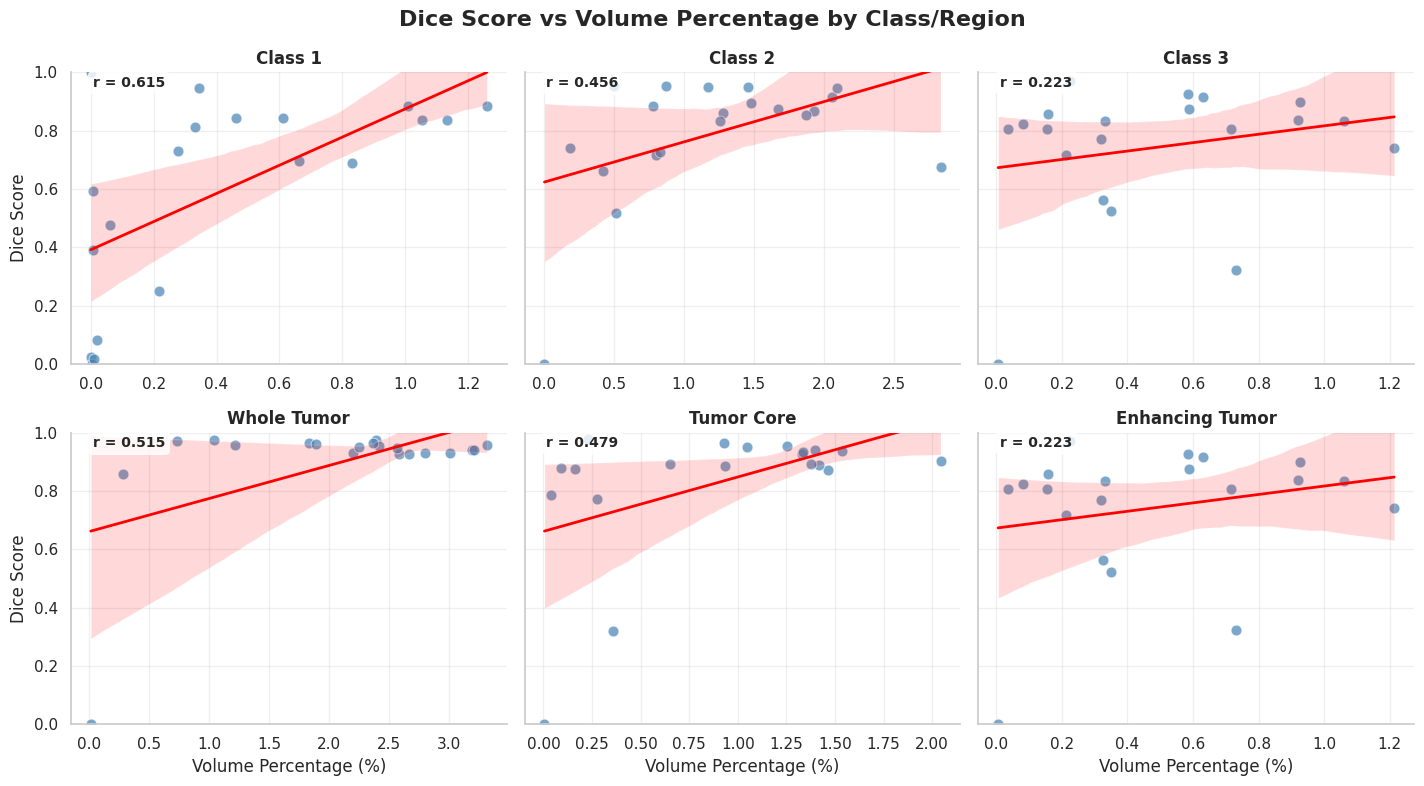

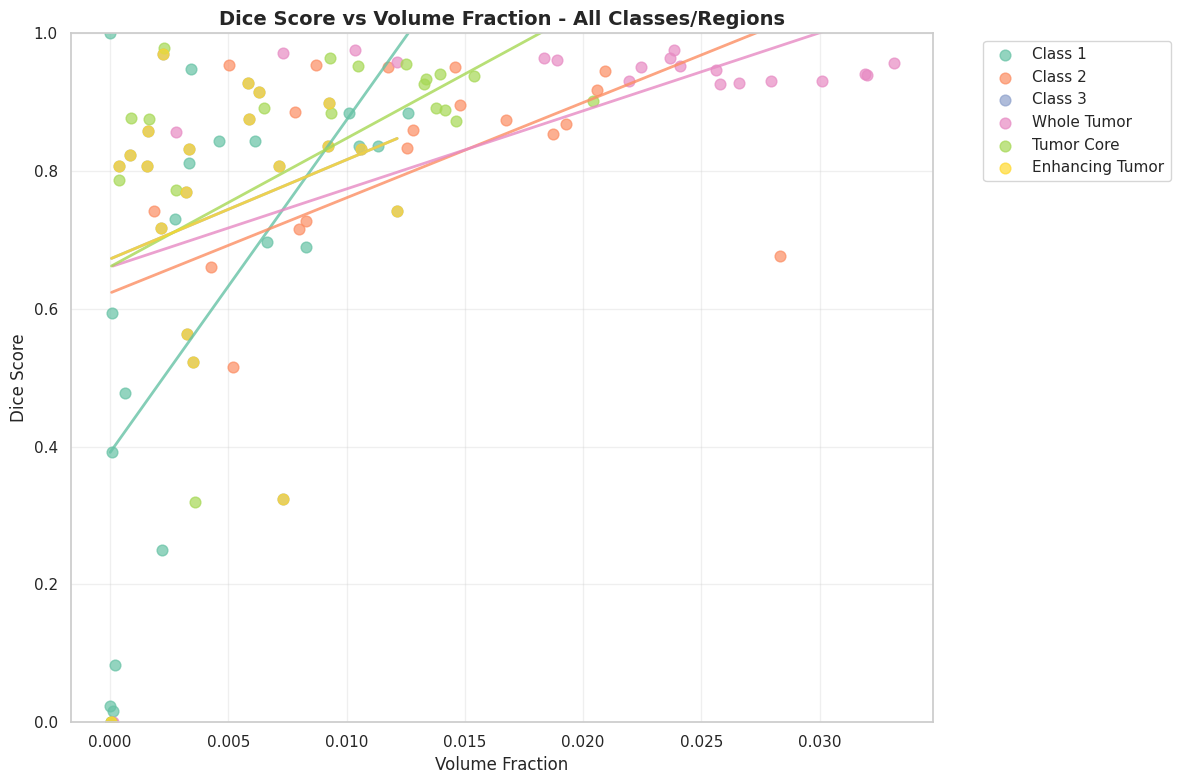

📊 Correlation Statistics (Dice Score vs Volume Fraction):
Class 1             : r =  0.615
Class 2             : r =  0.456
Class 3             : r =  0.223
Whole Tumor         : r =  0.515
Tumor Core          : r =  0.479
Enhancing Tumor     : r =  0.223

📈 Dice Score by Volume Quartiles:

Class 1:
                  mean    std  count
volume_quartile                     
Q1               0.402  0.418      5
Q2               0.312  0.294      5
Q3               0.829  0.090      5
Q4               0.826  0.080      5

Class 2:
                  mean    std  count
volume_quartile                     
Q1               0.574  0.358      5
Q2               0.847  0.117      5
Q3               0.883  0.045      5
Q4               0.852  0.105      5

Class 3:
                  mean    std  count
volume_quartile                     
Q1               0.659  0.369      5
Q2               0.771  0.149      5
Q3               0.810  0.167      5
Q4               0.727  0.232      5

Whole Tumor:

<ipython-input-10-1726515275>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['volume_quartile'] = pd.qcut(subset['volume_frac'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
<ipython-input-10-1726515275>:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_stats = subset.groupby('volume_quartile')['value'].agg(['mean', 'std', 'count'])
<ipython-input-10-1726515275>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

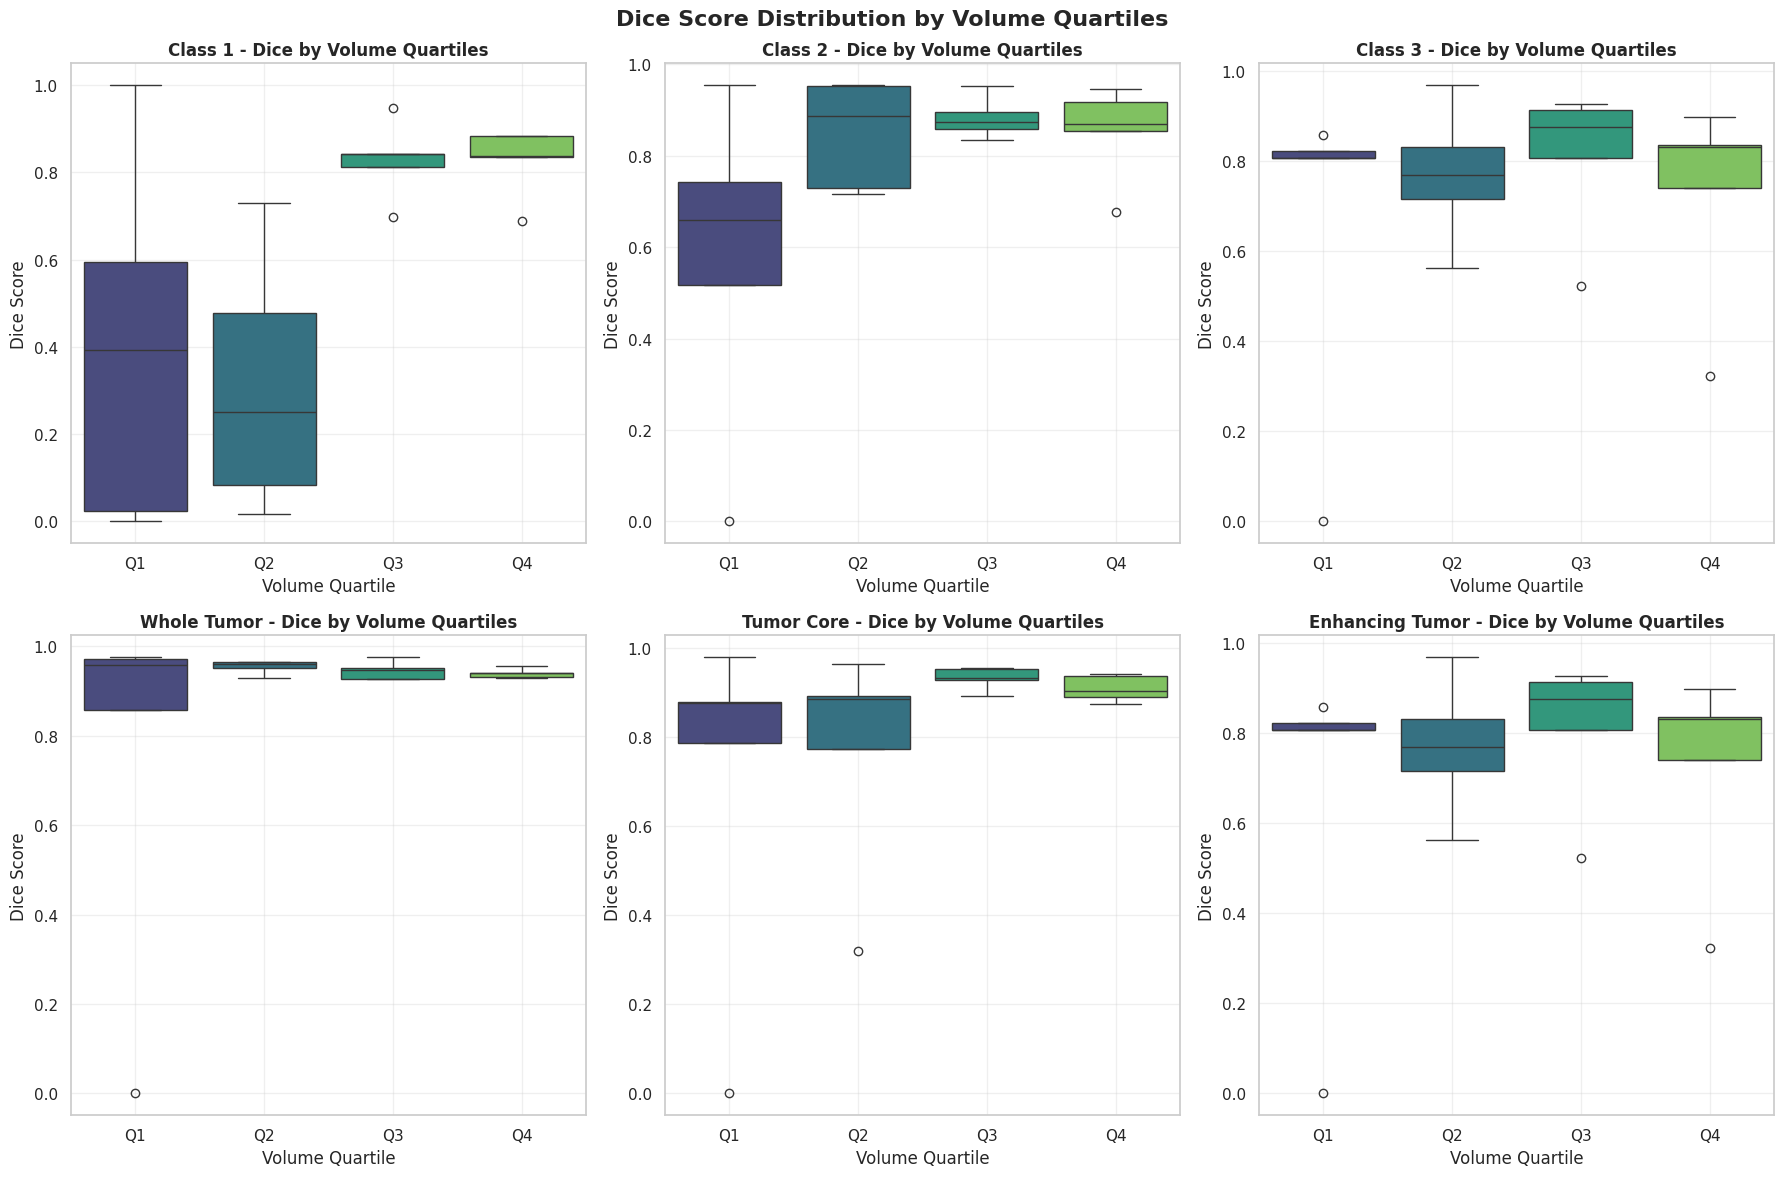

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

for cls in [1, 2, 3]:
    df[f'volume_frac_{cls}'] = df[f'volume_class_{cls}'] / df['volume_total_voxels']

plot_data = []

for cls in [1, 2, 3]:
    temp = df.copy()
    temp['metric'] = 'Dice Score'
    temp['value'] = temp[f'dice_class_{cls}']
    temp['volume_frac'] = temp[f'volume_frac_{cls}']
    temp['volume_percent'] = temp[f'volume_frac_{cls}'] * 100  # Convert to percentage
    temp['class'] = f'Class {cls}'
    plot_data.append(temp[['metric', 'value', 'volume_frac', 'volume_percent', 'class']])

composite_regions = {
    'dice_whole_tumor': ('Whole Tumor', 'volume_whole_tumor'),
    'dice_tumor_core': ('Tumor Core', 'volume_tumor_core'),
    'dice_enhancing_tumor': ('Enhancing Tumor', 'volume_enhancing_tumor')
}

for dice_col, (region_name, volume_col) in composite_regions.items():
    if dice_col in df.columns and volume_col in df.columns:
        temp = df.copy()
        temp['metric'] = 'Dice Score'
        temp['value'] = temp[dice_col]
        temp['volume_frac'] = temp[volume_col] / temp['volume_total_voxels']
        temp['volume_percent'] = temp['volume_frac'] * 100  # Convert to percentage
        temp['class'] = region_name
        plot_data.append(temp[['metric', 'value', 'volume_frac', 'volume_percent', 'class']])

plot_df = pd.concat(plot_data, ignore_index=True)

plt.figure(figsize=(20, 10))

g = sns.FacetGrid(plot_df, col="class", col_wrap=3, height=4, aspect=1.2,
                  sharex=False, sharey=True)

g.map_dataframe(sns.scatterplot, x="volume_percent", y="value",
                alpha=0.7, s=60, color='steelblue')

g.map_dataframe(sns.regplot, x="volume_percent", y="value",
                scatter=False, color='red', line_kws={'linewidth': 2})

g.set_axis_labels("Volume Percentage (%)", "Dice Score")

for ax, class_name in zip(g.axes.flat, plot_df['class'].unique()):
    ax.set_title(f'{class_name}', fontweight='bold', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)

    subset = plot_df[plot_df['class'] == class_name]
    if len(subset) > 1:
        corr = subset['volume_frac'].corr(subset['value'])
        ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=10, fontweight='bold')

plt.suptitle('Dice Score vs Volume Percentage by Class/Region',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

colors = sns.color_palette("Set2", n_colors=len(plot_df['class'].unique()))
class_colors = dict(zip(plot_df['class'].unique(), colors))

for class_name in plot_df['class'].unique():
    subset = plot_df[plot_df['class'] == class_name]
    plt.scatter(subset['volume_frac'], subset['value'],
               label=class_name, alpha=0.7, s=60,
               color=class_colors[class_name])

    if len(subset) > 1:
        z = np.polyfit(subset['volume_frac'], subset['value'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(subset['volume_frac'].min(), subset['volume_frac'].max(), 100)
        plt.plot(x_line, p(x_line), color=class_colors[class_name], linewidth=2, alpha=0.8)

plt.xlabel('Volume Fraction', fontsize=12)
plt.ylabel('Dice Score', fontsize=12)
plt.title('Dice Score vs Volume Fraction - All Classes/Regions', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("📊 Correlation Statistics (Dice Score vs Volume Fraction):")
print("="*60)
for class_name in plot_df['class'].unique():
    subset = plot_df[plot_df['class'] == class_name]
    if len(subset) > 1:
        corr = subset['volume_frac'].corr(subset['value'])
        print(f"{class_name:20s}: r = {corr:6.3f}")

print("\n📈 Dice Score by Volume Quartiles:")
print("="*50)
for class_name in plot_df['class'].unique():
    subset = plot_df[plot_df['class'] == class_name]
    if len(subset) > 4:  # Need enough data for quartiles
        subset['volume_quartile'] = pd.qcut(subset['volume_frac'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        quartile_stats = subset.groupby('volume_quartile')['value'].agg(['mean', 'std', 'count'])
        print(f"\n{class_name}:")
        print(quartile_stats.round(3))

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, class_name in enumerate(plot_df['class'].unique()):
    if i < len(axes):
        subset = plot_df[plot_df['class'] == class_name]
        if len(subset) > 4:
            subset['volume_quartile'] = pd.qcut(subset['volume_frac'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
            sns.boxplot(data=subset, x='volume_quartile', y='value', ax=axes[i], palette='viridis')
            axes[i].set_title(f'{class_name} - Dice by Volume Quartiles', fontweight='bold')
            axes[i].set_xlabel('Volume Quartile')
            axes[i].set_ylabel('Dice Score')
            axes[i].grid(True, alpha=0.3)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Dice Score Distribution by Volume Quartiles', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()